In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file = r'eCO2mix_RTE_Annuel-Definitif_2017.xlsx'

#book = xlrd.open_workbook(file)
#print("The number of worksheets is", book.nsheets)
#print("Worksheet name(s):", book.sheet_names())

df = pd.read_excel(file)

In [3]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 36 columns):
Perimetre                               35041 non-null object
Nature                                  35041 non-null object
Date                                    35040 non-null object
Heures                                  35040 non-null object
Consommation                            17520 non-null float64
Pr�vision J-1                           35040 non-null float64
Pr�vision J                             35040 non-null float64
Fioul                                   17520 non-null float64
Charbon                                 17520 non-null float64
Gaz                                     17520 non-null float64
Nucleaire                               17520 non-null float64
Eolien                                  17520 non-null float64
Solaire                                 17520 non-null float64
Hydraulique                             17520 non-null float64
Pompage      

In [4]:
df["DateTime"] = df["Date"] + ' ' + df["Heures"]
#print(df["DateTime"])
cols = ['Perimetre', 'Nature', 'DateTime'] + [col for col in df if col != 'DateTime' and col != 'Perimetre' and col != 'Nature']
#cols = ['DateTime']  + [col for col in df if col != 'DateTime']
df = df[cols]
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M')

df2 = df.set_index('DateTime', inplace=False)
df2.head()

,Perimetre,Nature,Date,Heures,Consommation,Pr�vision J-1,Pr�vision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cog�n.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + �clus�e,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bio�nergies - D�chets,Bio�nergies - Biomasse,Bio�nergies - Biogaz
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,France,Donn�es d�finitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,-2.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
2017-01-01 00:15:00,France,Donn�es d�finitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,France,Donn�es d�finitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,8.0,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0
2017-01-01 00:45:00,France,Donn�es d�finitives,2017-01-01,00:45,NaN,74150.0,74250.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,France,Donn�es d�finitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,8.0,2375.0,4149.0,61.0,2661.0,2522.0,385.0,556.0,283.0,252.0


[Text(0,0.5,'Charbon9 (MW)'), Text(0.5,0,'Eolien (MW)')]

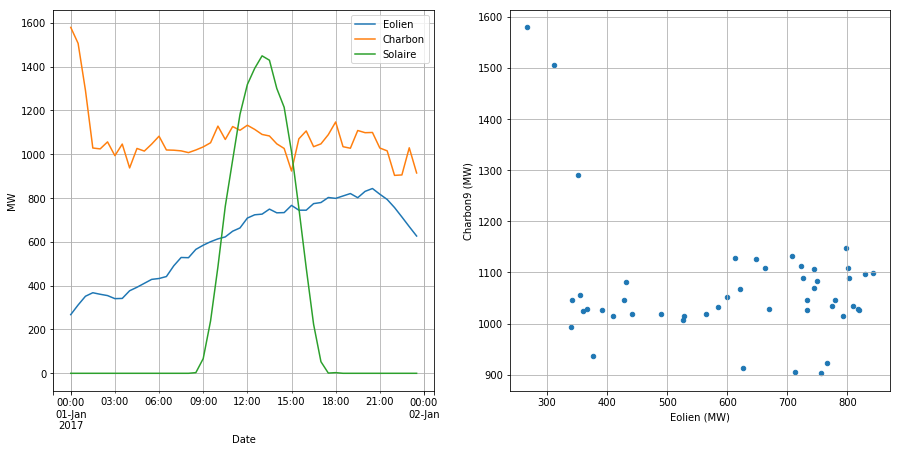

In [9]:
df3 = df2[['Eolien', 'Charbon', 'Solaire']]
df4 = df3['2017-01-01':'2017-01-01']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,7))

df4.dropna().plot(grid=True, ax=axes[0])
axes[0].set(xlabel='Date', ylabel='MW')
axes[0].grid(True, which='minor', axis='x' )
df4.dropna().plot.scatter(x='Eolien', y='Charbon', grid=True, ax=axes[1])
axes[1].set(xlabel='Eolien (MW)', ylabel='Charbon9 (MW)')

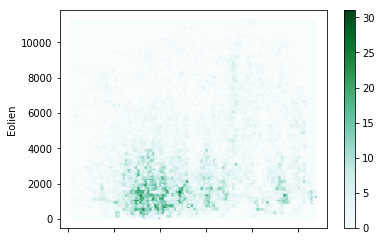

In [6]:
df.plot.hexbin(x='Nucleaire', y='Eolien', gridsize=100)